# Azerbaijan Supermarket Sales Analysis
**Objective:**
Analyze point-of-sale (POS) data from a local supermarket chain. Identify underperforming products, peak sales periods, and high/low performing stores

## Import libraries

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load and clean data

In [50]:
data = pd.read_csv('SuperMarket Analysis.csv')

In [51]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [52]:
data['Branch'].value_counts()

Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64

In [53]:
data['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

### 1. Simulating store names to match Baku regions. 
### 2. Doing product category mapping adjusted to local products

In [54]:
branch_map = {
    "Alex": "Nizami",
    "Cairo": "Yasamal",
    "Giza": "Narimanov"
}

city_map = {
    "Yangon": "Baku",
    "Mandalay": "Baku",
    "Naypyitaw": "Baku"
}


data["Branch"] = data["Branch"].map(branch_map)
data["City"] = data["City"].map(city_map)


In [55]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Nizami,Baku,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Narimanov,Baku,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Nizami,Baku,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Nizami,Baku,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Nizami,Baku,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


### Analyze the data

In [56]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Good! There are no missing values.

In [57]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [59]:
data.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [60]:
print("Minimum rating: ", data['Rating'].min())
print("Maximum rating: ", data['Rating'].max())

Minimum rating:  4.0
Maximum rating:  10.0


### Checking for outliers

In [61]:
num_cols = data.select_dtypes(include=["int64", "float64"]).columns

outliers = {}

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    mask = (data[col] < lower_bound) | (data[col] > upper_bound)
    
    outliers[col] = data.loc[mask, col]

    print(f"{col}: {mask.sum()} outliers")


Unit price: 0 outliers
Quantity: 0 outliers
Tax 5%: 9 outliers
Sales: 9 outliers
cogs: 9 outliers
gross margin percentage: 0 outliers
gross income: 9 outliers
Rating: 0 outliers


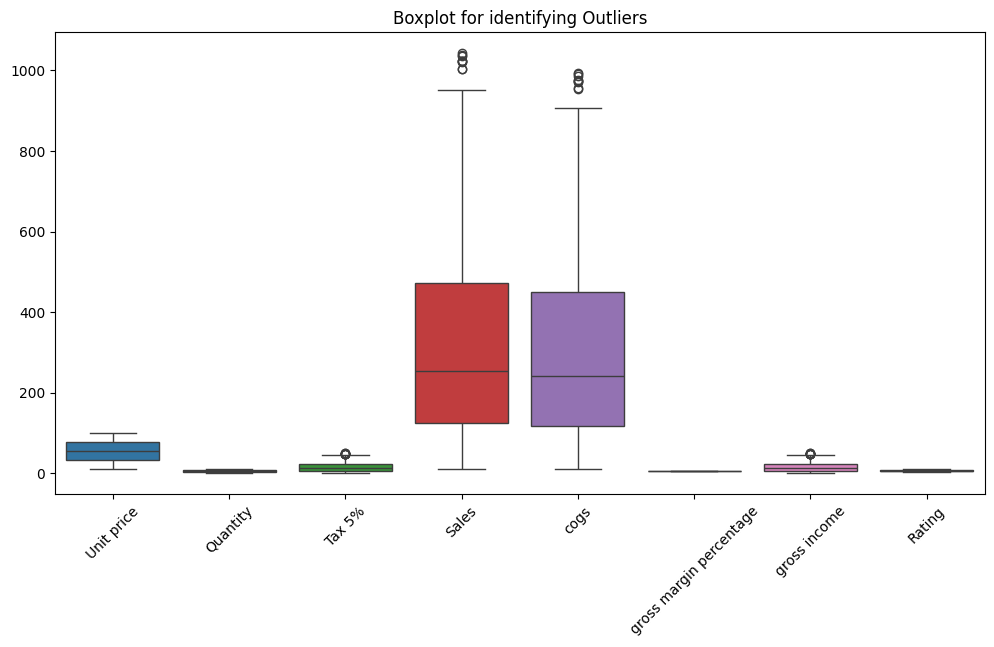

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data[num_cols])
plt.title("Boxplot for identifying Outliers")
plt.xticks(rotation=45)
plt.show()

## Grouping the data

In [63]:
data.groupby(by='Branch')['Rating'].mean()

Branch
Narimanov    7.072866
Nizami       7.027059
Yasamal      6.818072
Name: Rating, dtype: float64

In [64]:
data.groupby(by='Branch')['Sales'].sum()

Branch
Narimanov    110568.7065
Nizami       106200.3705
Yasamal      106197.6720
Name: Sales, dtype: float64

In [65]:
data.groupby(by='Date')['Sales'].sum()

Date
1/1/2019     4745.1810
1/10/2019    3560.9490
1/11/2019    2114.9625
1/12/2019    5184.7635
1/13/2019    2451.2040
               ...    
3/5/2019     6230.8785
3/6/2019     3092.5965
3/7/2019     1438.2585
3/8/2019     3125.3880
3/9/2019     7474.0470
Name: Sales, Length: 89, dtype: float64

In [66]:
data.groupby("Product line")["Sales"].sum().sort_values(ascending=False)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Sales, dtype: float64

In [67]:
data["Date"] = pd.to_datetime(data["Date"])
data["Month"] = data["Date"].dt.to_period("M")
data.groupby("Month")["Sales"].sum()

Month
2019-01    116291.868
2019-02     97219.374
2019-03    109455.507
Freq: M, Name: Sales, dtype: float64

In [68]:
data.groupby(["Customer type", "Branch"])["Sales"].sum().unstack()

Branch,Narimanov,Nizami,Yasamal
Customer type,,,
Member,66974.8170,62895.7770,59824.170
Normal,43593.8895,43304.5935,46373.502


In [69]:
data.groupby("Product line")["Rating"].mean().sort_values(ascending=False)

Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64

### Finding best/worst selling products

In [70]:
sales_by_category = data.groupby("Product line")["Sales"].sum().sort_values(ascending=False)

print("Best Selling Product:")
print(sales_by_category.head(1))

print("\nWorst Selling Product:")
print(sales_by_category.tail(1))


Best Selling Product:
Product line
Food and beverages    56144.844
Name: Sales, dtype: float64

Worst Selling Product:
Product line
Health and beauty    49193.739
Name: Sales, dtype: float64


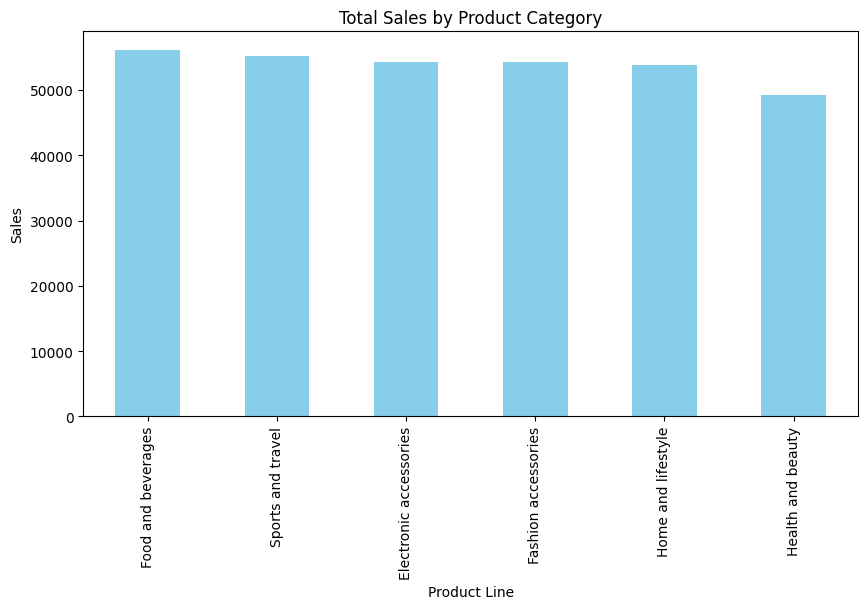

In [71]:
sales_by_category.plot(kind="bar", figsize=(10,5), color="skyblue")
plt.title("Total Sales by Product Category")
plt.ylabel("Sales")
plt.xlabel("Product Line")
plt.show()


## EDA (Exploratory Data Analysis)

### Monthly Sales Trend

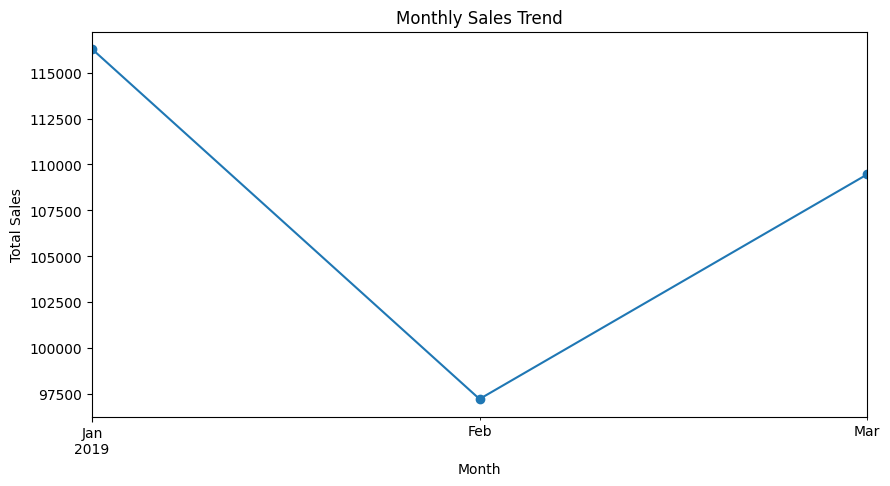

In [72]:
data["Date"] = pd.to_datetime(data["Date"])
data["Month"] = data["Date"].dt.to_period("M")

monthly_sales = data.groupby("Month")["Sales"].sum()

monthly_sales.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.show()


### Sales by Branch (Location Performance)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15036\2541119287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Branch", y="Sales", data=data, estimator=sum, palette="Set2")


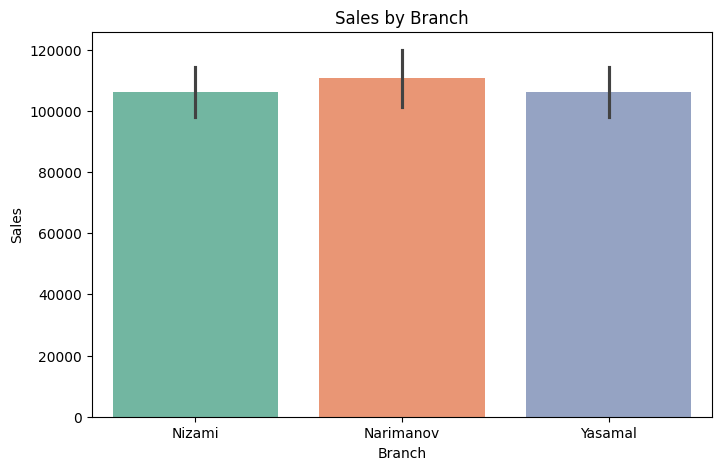

In [73]:
plt.figure(figsize=(8,5))
sns.barplot(x="Branch", y="Sales", data=data, estimator=sum, palette="Set2")
plt.title("Sales by Branch")
plt.show()


### Payment Method Distribution

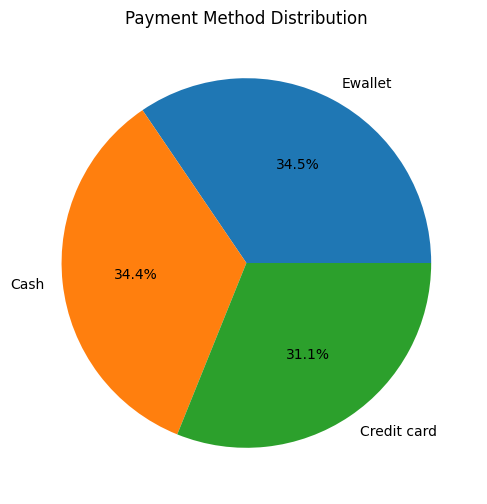

In [74]:
data["Payment"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(6,6))
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()


### Customer Type vs Sales

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15036\815037449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Customer type", y="Sales", data=data, estimator=sum, palette="coolwarm")


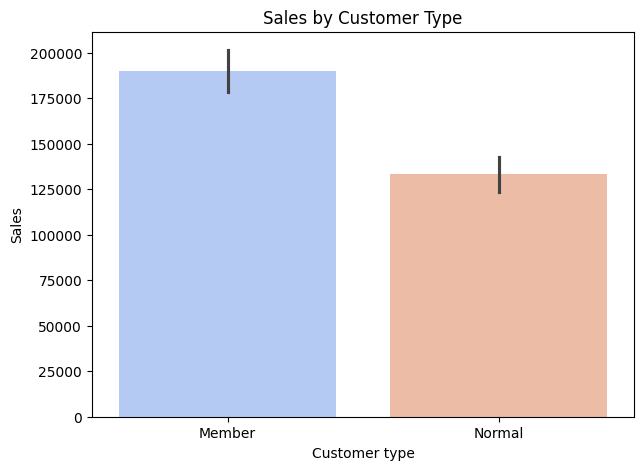

In [75]:
plt.figure(figsize=(7,5))
sns.barplot(x="Customer type", y="Sales", data=data, estimator=sum, palette="coolwarm")
plt.title("Sales by Customer Type")
plt.show()


### Gender Analysis by Product Category

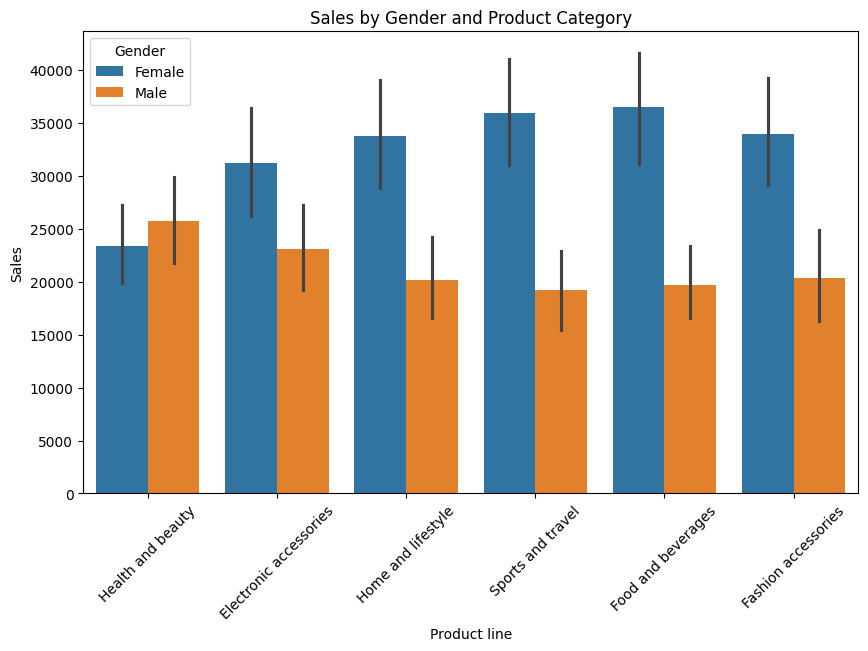

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(x="Product line", y="Sales", hue="Gender", data=data, estimator=sum)
plt.title("Sales by Gender and Product Category")
plt.xticks(rotation=45)
plt.show()


### Average Customer Rating by Product Category

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15036\284116406.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product line", y="Rating", data=data, estimator="mean", palette="muted")


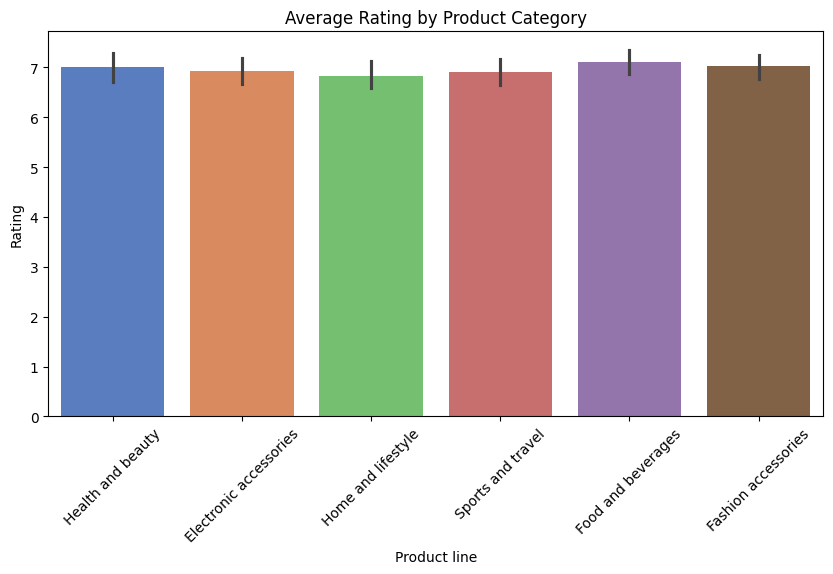

In [77]:
plt.figure(figsize=(10,5))
sns.barplot(x="Product line", y="Rating", data=data, estimator="mean", palette="muted")
plt.title("Average Rating by Product Category")
plt.xticks(rotation=45)
plt.show()


### Hourly Sales Trend

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15036\2159608569.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Hour"] = pd.to_datetime(data["Time"]).dt.hour
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15036\2159608569.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Hour", y="Sales", data=data, estimator=sum, ci=None, marker="o")


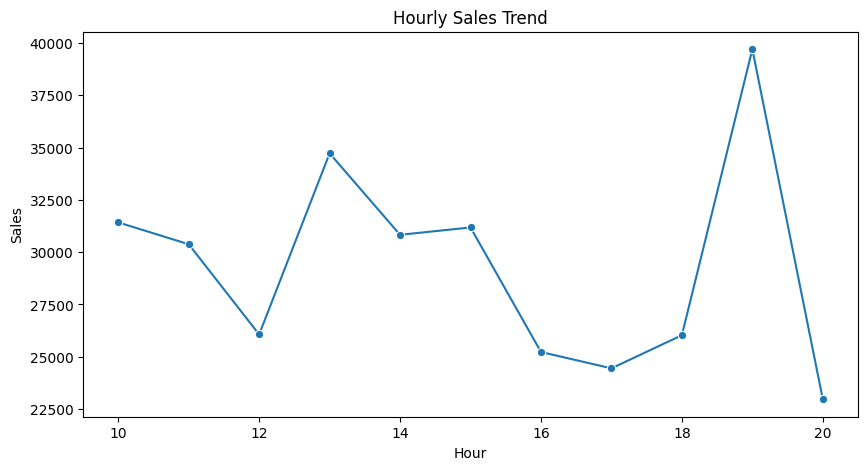

In [79]:
data["Hour"] = pd.to_datetime(data["Time"]).dt.hour

plt.figure(figsize=(10,5))
sns.lineplot(x="Hour", y="Sales", data=data, estimator=sum, ci=None, marker="o")
plt.title("Hourly Sales Trend")
plt.show()


### Gross Income by Branch

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15036\900390837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Branch", y="gross income", data=data, estimator=sum, palette="pastel")


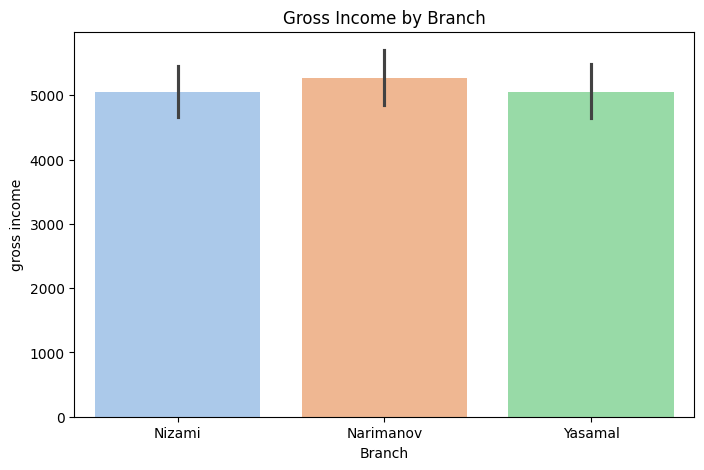

In [80]:
plt.figure(figsize=(8,5))
sns.barplot(x="Branch", y="gross income", data=data, estimator=sum, palette="pastel")
plt.title("Gross Income by Branch")
plt.show()


# END!